### Questions
* Transforming data into categorical data (binning)
    * when to use this? 

### Objectives
YWBAT
* MLS = Multiple Linear Regression
* define assumptions of the MLR
* Interpret a statsmodels OLS to check those assumptions
* Iterating through models to best predict some target

### Multiple Linear Regression

* Equation
    * target = $\beta_0$ + $\beta_1 X_1$ + ... + $\beta_n X_n$ 
    * 
    * target = $\beta_0$ + $\bar{\beta} \bar{X}$
    * 
    * y = $\beta X$
    
* What are we trying to solve for? 
    * Beta values - parameters - coefficients
    
    
#### Assumptions
* Your features must be linearly correlated with your target
* Your residuals must be normally distributed and homoscedastitous (sp?)
    * Your features must be normally distributed
* Your features cannot contain multicollinearity
    * In other words, f_i cannot be correlated with f_j for any i and j. 
    
### Multicollinearity
* Creates a system without a solution

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names

In [4]:
df = pd.DataFrame(data, columns=features)
df['target'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
X = np.array([[2, 5], [3, 7]])
y = np.array([[5], [10]])

# y = Xb
# X.T y = X.T X b 
# (X.T X)^-1 X.T y    = (X.T X)^-1 (X.T X) b
# (X.T X)^-1 X.T y = b


In [11]:
#
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
b

array([[15.],
       [-5.]])

In [14]:
# let's introduce a little 'chaos' multicollinearity
X = np.array([[2, 8.005], [3, 12]])
y = np.array([[5], [10]])

In [15]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
b

array([[1336.66666935],
       [-333.333334  ]])

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
### Basic eyeball testing using a heatmap

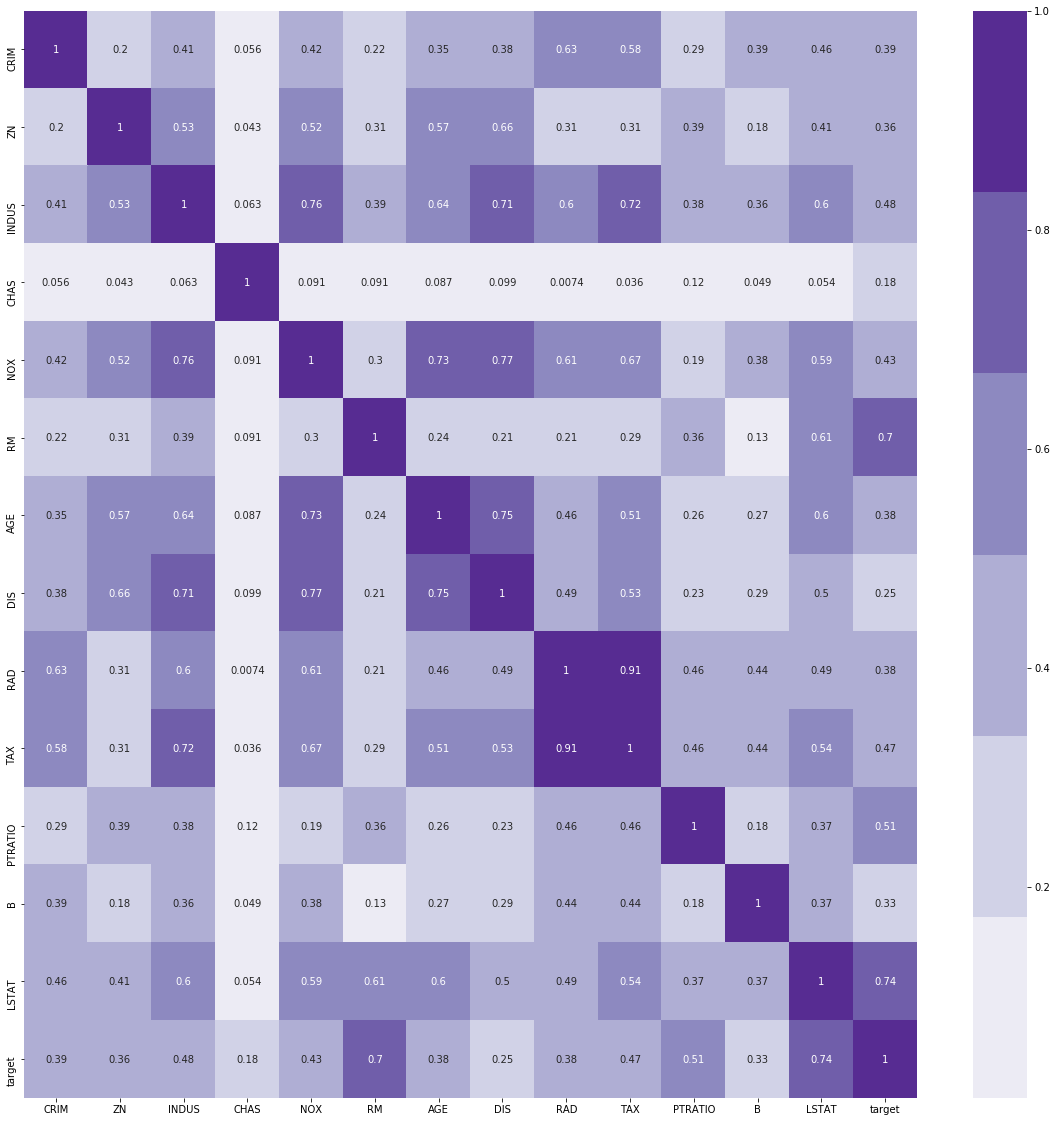

In [25]:
corr = df.corr()
# corr_sliced = corr[np.where(corr <= 0.20)]
plt.figure(figsize=(20, 20))
sns.heatmap(data=corr.abs(), annot=True, cmap=sns.color_palette('Purples'))
plt.show()

In [32]:
def plot_regplot(df=df, x='RM', y='target'):
    sns.regplot(x=x, y=y, data=df)
    plt.show()

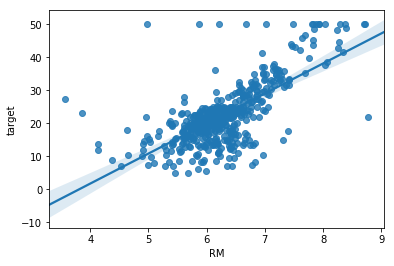

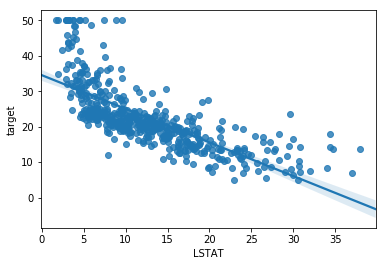

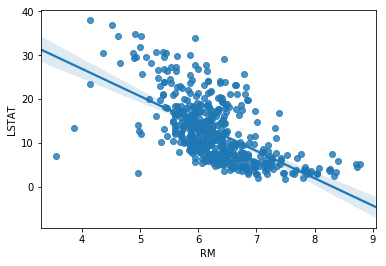

In [33]:
plot_regplot(x='RM', y='target')
plot_regplot(x='LSTAT')
plot_regplot(x='RM', y='LSTAT')

In [38]:
## Let's see if we can combine them for a higher correlation
weights = np.linspace(0, 1 ,50)

best_weight = 0
max_corr = 0

for weight in weights:
    # creating a new feature by taking a weighted sum
    new_feature = weight*df["RM"] + (1 - weight)*df["LSTAT"]
    
    corr_coef = np.corrcoef(new_feature, df["target"])[0][1]
    if np.abs(corr_coef) > max_corr:
        max_corr = np.abs(corr_coef)
        best_weight = weight

print(best_weight, 1 - best_weight)



0.0 1.0


0.695359947071539

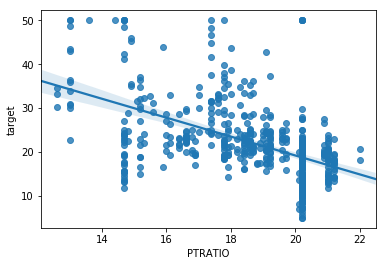

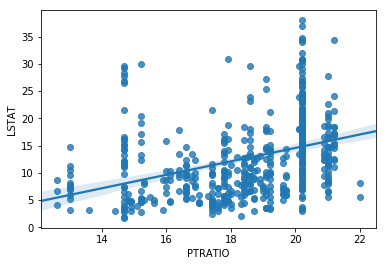

In [41]:
plot_regplot(x="PTRATIO")
plot_regplot(x="PTRATIO", y="LSTAT")

In [47]:
def make_ols(df=df, feature_list= ["LSTAT", "PTRATIO"], target='target'):
        y = df[target]
        X = df[feature_list]


        linreg = sm.OLS(y, X).fit()
        summary = linreg.summary()
        print(summary)
        return linreg

In [48]:
linreg1 = make_ols()

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              1833.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                   5.38e-232
Time:                        15:01:12   Log-Likelihood:                         -1798.4
No. Observations:                 506   AIC:                                      3601.
Df Residuals:                     504   BIC:                                      3609.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Summarize this
* Model
    * R2 = 0.879 and so is Adj R2 which is good
    * F-Stat = 0.0 
        * F-Stat < 0.05 means we're confident in the signal from our features 
* Features
    * LSTAT
        * p = 0 -> this is probably not random
    * PTRATIO 
        * p = 0 -> this is probably not random

* Residuals
    * Skew = 1.18 -> Positively Skewed
    * Kurtosis = 4.405 -> Most of the data is within 4.4 standard deviations, should be close to 3
    * Jarque-Bera = geometric mean of Skewness and Kurtosis scaled to sample size (low)
        * compare between models
    * Cond. No = Invertability of Feature Space
        * High Number -> Multicollinearity
        * Low Number -> Consistent System

In [50]:
linreg2 = make_ols(feature_list=["PTRATIO", "RM"])

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              3774.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                   5.38e-304
Time:                        15:01:43   Log-Likelihood:                         -1632.0
No. Observations:                 506   AIC:                                      3268.
Df Residuals:                     504   BIC:                                      3276.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

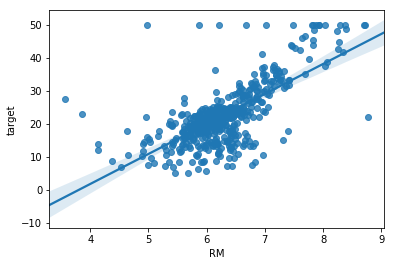

In [51]:
plot_regplot()

In [52]:
from sklearn.preprocessing import PowerTransformer